# Installs

In [ ]:
!pip install opencv-python
# !pip install prettytable
!sudo apt install tesseract-ocr --yes
!pip install pytesseract

  Using cached opencv_python-4.7.0.68-cp37-abi3-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (61.8 MB)
You should consider upgrading via the '/local_disk0/.ephemeral_nfs/envs/pythonEnv-5ae3a024-ef66-431f-9a07-c6d61b381415/bin/python -m pip install --upgrade pip' command.



The following additional packages will be installed:
  liblept5 libtesseract4 tesseract-ocr-eng tesseract-ocr-osd
The following NEW packages will be installed:
  liblept5 libtesseract4 tesseract-ocr tesseract-ocr-eng tesseract-ocr-osd
0 upgraded, 5 newly installed, 0 to remove and 24 not upgraded.
Need to get 7,086 kB of archives.
After this operation, 22.3 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu focal/universe amd64 liblept5 amd64 1.79.0-1 [999 kB]
Get:2 http://archive.ubuntu.com/ubuntu focal/universe amd64 libtesseract4 amd64 4.1.1-2build2 [1,237 kB]
Get:3 http://archive.ubuntu.com/ubuntu focal/universe amd64 tesseract-ocr-eng all 1:4.00~git30-7274cfa-1 [1,598 kB]
Get:4 h

In [ ]:
!sudo apt install tesseract-ocr-heb --yes




The following NEW packages will be installed:
  tesseract-ocr-heb
0 upgraded, 1 newly installed, 0 to remove and 24 not upgraded.
Need to get 432 kB of archives.
After this operation, 976 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu focal/universe amd64 tesseract-ocr-heb all 1:4.00~git30-7274cfa-1 [432 kB]
Fetched 432 kB in 0s (3,103 kB/s)
debconf: delaying package configuration, since apt-utils is not installed

78Selecting previously unselected package tesseract-ocr-heb.
(Reading database ... 103665 files and directories currently installed.)
Preparing to unpack .../tesseract-ocr-heb_1%3a4.00~git30-7274cfa-1_all.deb ...
7Progress: [  0%] [..........................................................] 87Progress: [ 20%] [###########...............................................] 8Unpacking tesseract-ocr-heb (1:4.00~git30-7274cfa-1) ...
7Progress: [ 40%] [#######################...................................] 8Setting up tesseract-ocr-h

# Imports + Global Configurations

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
import PIL
import pytesseract
import os

In [ ]:
print(pytesseract.get_tesseract_version())
print(pytesseract.get_languages())

4.1.1
['eng', 'heb', 'osd']


In [ ]:
os.environ['TESSDATA_PREFIX'] = 'Extract Tabular Data/tessdata_dir/'

In [ ]:
"""
Best Rsults: --psm 12 --oem 1
History:
 8) --psm 12 --oem 1 --dpi 3000         -> eng 80%
 7) --psm 12 --oem 2                    -> eng 90%, heb 78%-10%+5% -> ',' and '.' it cant decide between the two
 6) --psm 12 --oem 1                    -> eng 95%, heb 78%-10%+5% -> ',' and '.' it cant decide between the two
 5) --psm 12 --oem 0                    -> eng 85%
 4) --psm 12                            -> eng 90%, heb 75%-15+3%%
 3) --psm 6                             -> 40%
 2) --psm 5                             -> 10% 
 1) --psm 11                            -> eng 85%, heb 70%+-15%
URL: https://muthu.co/all-tesseract-ocr-options/
"""
special_config = '--psm 12 --oem 1'
languages_ = "eng"

# Image Loading - OpenCV + PIL

In [ ]:
image_path = "Model Implementation/DummyDatabase/predictions/image_crop.png"

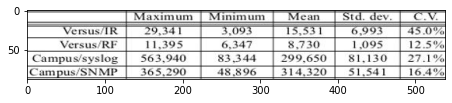

In [ ]:
img_cv=cv2.imread(image_path)
plt.figure(figsize = (7.5, 5))
plt.imshow(img_cv)
plt.show()

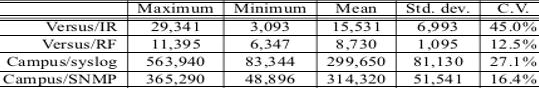

In [ ]:
img_pl=PIL.Image.open(image_path)
img_pl

# pytesseract.image_to_string

In [ ]:
text_cv=pytesseract.image_to_string(img_cv,lang="heb+eng", config=special_config)
text_pl=pytesseract.image_to_string(img_pl,lang="eng", config=special_config)

In [ ]:
len(text_cv), len(text_pl)

Out[145]: (244, 244)

In [ ]:
text_pl

Out[146]: 'Maximum | Minimum\n\nMean\n\nStd. dev.\n\nC.V.\n\nVersus/IR\n\n39341\n\n3.093\n\n15531\n\n6.993\n\n45.0%\n\nVersus/RF\n\n11,395\n\n6.347\n\n8.730\n\n1.095\n\n12.5%\n\nCampus/syslog\n\n563.940\n\n83344\n\n299.650\n\n81,130\n\n27.1%\n\nCampus/SNMP\n\n365.290\n\n48.896\n\n314,320\n\n51.541\n\n16.4%\n\x0c'

In [ ]:
text_pl_copy = text_pl.replace('\n\n', '<br>')#.replace('\n', '\t').replace('<br>', '\n')
# text_pl_copy = re.sub(r'\n+', '\n', text_pl_copy)
# text_pl_copy = [[w.strip().replace('|', '').replace('[', '').replace('(', '') for w in t.split('\t') if len(w.strip()) > 1] for t in text_pl_copy.split('\n')]
# len(text_pl_copy)#, len(text_pl_copy[0]), len(text_pl_copy[1]), len(text_pl_copy[2]), len(text_pl_copy[3])
text_pl_copy

Out[147]: 'Maximum | Minimum<br>Mean<br>Std. dev.<br>C.V.<br>Versus/IR<br>39341<br>3.093<br>15531<br>6.993<br>45.0%<br>Versus/RF<br>11,395<br>6.347<br>8.730<br>1.095<br>12.5%<br>Campus/syslog<br>563.940<br>83344<br>299.650<br>81,130<br>27.1%<br>Campus/SNMP<br>365.290<br>48.896<br>314,320<br>51.541<br>16.4%\n\x0c'

In [ ]:
text_pl

Out[148]: 'Maximum | Minimum\n\nMean\n\nStd. dev.\n\nC.V.\n\nVersus/IR\n\n39341\n\n3.093\n\n15531\n\n6.993\n\n45.0%\n\nVersus/RF\n\n11,395\n\n6.347\n\n8.730\n\n1.095\n\n12.5%\n\nCampus/syslog\n\n563.940\n\n83344\n\n299.650\n\n81,130\n\n27.1%\n\nCampus/SNMP\n\n365.290\n\n48.896\n\n314,320\n\n51.541\n\n16.4%\n\x0c'

# pytesseract.image_to_data

In [ ]:
data = pytesseract.image_to_data(img_pl, lang=languages_, output_type='data.frame', config=special_config)
data

,level,page_num,block_num,par_num,line_num,word_num,left,top,width,height,conf,text
0,1,1,0,0,0,0,0,0,539,88,-1,NaN
1,2,1,1,0,0,0,139,4,74,9,-1,NaN
2,3,1,1,1,0,0,139,4,74,9,-1,NaN
3,4,1,1,1,1,0,139,4,74,9,-1,NaN
4,5,1,1,1,1,1,139,4,74,9,95,Maximum
...,...,...,...,...,...,...,...,...,...,...,...,...
135,5,1,33,1,1,1,415,74,45,10,68,51.541
136,2,1,34,0,0,0,493,75,35,8,-1,NaN
137,3,1,34,1,0,0,493,75,35,8,-1,NaN
138,4,1,34,1,1,0,493,75,35,8,-1,NaN


# Optimize the `df`

##### Take only the following ["left", "top", "width", "text"]
##### Sum `left` and `width`
##### Sort + Dropna

In [ ]:
def optimizeDf(old_df: pd.DataFrame) -> pd.DataFrame:
    df = old_df[["left", "top", "width", "text"]]
    df['left+width'] = df['left'] + df['width']
    df = df.sort_values(by=['top'], ascending=True)
    df = df.groupby(['top', 'left+width'], sort=False)['text'].sum().unstack('left+width')
    df = df.reindex(sorted(df.columns), axis=1).dropna(how='all').dropna(axis='columns', how='all')
    df = df.fillna('')
    return df
data_imp_sort = optimizeDf(data)
data_imp_sort

<command-4464158006153674>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['left+width'] = df['left'] + df['width']


left+width,14,93,115,116,117,163,198,200,204,213,289,294,305,318,376,379,385,430,457,460,463,469,470,506,508,526,528,536,539
top,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,,,,,,,,,,,,,,,,,,,,,,,,,,,,,0
3,,,,,,,,,,,,,,|,,,,Std.,,,dev,,,,,,,,
4,,,,,,,,,,Maximum,,,Minimum,,Mean,,,,,,,,,,—C,WV.,,,
14,,,,,,,,,,,,,,,,,,,,,,_,,,,,,,
18,,,,,,,20.341,,,,,,,,,T5531,,,,,,,5003,,,,,,
22,,Versus,,,IR,,,,,,3.003,,,,,,,,,,,,,as,,,,,
27,,,,,,,,,,,,,,,,,,,,,,,,,,,,%,
39,,,Versus/RF,,,,,,,,6.347,,,,8.730,,,,,,,,,12,,,,,
40,,,,,,,,11.395,,,,,,,,,,,1.005,,,,,,,,,,


# Merge Columns

In [ ]:
def mergeDfColumns(old_df: pd.DataFrame, threshold: int = 10, rotations: int = 5) -> pd.DataFrame: # threshold was 10
  df = old_df.copy()
  for j in range(0, rotations):
    new_columns = {}
    old_columns = df.columns
    i = 0
    while i < len(old_columns):
      if i < len(old_columns) - 1:
        if any(old_columns[i+1] == old_columns[i] + x for x in range(1, threshold)):
          new_col = df[old_columns[i]].astype(str) + df[old_columns[i+1]].astype(str)
          new_columns[old_columns[i+1]] = new_col
          i = i + 1
        else:
          new_columns[old_columns[i]] = df[old_columns[i]]
      else:
        new_columns[old_columns[i]] = df[old_columns[i]]
      i += 1
    df = pd.DataFrame.from_dict(new_columns).replace('', np.nan).dropna(axis='columns', how='all').replace(np.nan, '')
  return df

In [ ]:
df_new_col = mergeDfColumns(data_imp_sort) # 9 col x 7 row
df_new_col

,14,93,117,163,200,213,294,305,318,385,430,470,508,528,539
top,,,,,,,,,,,,,,,
0,,,,,,,,,,,,,,,0
3,,,,,,,,,|,,Std.,dev,,,
4,,,,,,Maximum,,Minimum,,Mean,,,—C,WV.,
14,,,,,,,,,,,,_,,,
18,,,,,20.341,,,,,T5531,,5003,,,
22,,Versus,IR,,,,3.003,,,,,,as,,
27,,,,,,,,,,,,,,,%
39,,,Versus/RF,,,,6.347,,,8.730,,,12,,
40,,,,,11.395,,,,,,,1.005,,,


# Merge Rows

In [ ]:
df_new_rows = df_new_col.copy()

In [ ]:
def mergeDfRows(old_df: pd.DataFrame, threshold: int = 10) -> pd.DataFrame:
    new_df = old_df.iloc[:1]
    for i in range(1, len(old_df)):
        if abs(old_df.index[i] - old_df.index[i - 1]) < threshold:
            new_df.iloc[-1] = new_df.iloc[-1].astype(str) + old_df.iloc[i].astype(str)
        else:
            new_df = new_df.append(old_df.iloc[i])
    return new_df.reset_index(drop=True)

In [ ]:
merged_row_df = mergeDfRows(df_new_rows, threshold = 5)
merged_row_df

/databricks/python/lib/python3.9/site-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
/databricks/python/lib/python3.9/site-packages/pandas/core/indexing.py:723: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value, self.name)


,14,93,117,163,200,213,294,305,318,385,430,470,508,528,539
0,,,,,,Maximum,,Minimum,|,Mean,Std.,dev,—C,WV.,0
1,,Versus,IR,,20.341,,3.003,,,T5531,,_5003,as,,
2,,,,,,,,,,,,,,,%
3,,,Versus/RF,,11.395,,6.347,,,8.730,,1.005,12,,
4,,,Campus/syslog,,,563.940,83344,,,299.650,,"81,130",27,,
5,=,,mpus/SNMP,36,,350,38.896,,,314.320,,51.541,,16.47,


# Clean the `dataframe`

Removes all the column and rows that have the following:
 - only empty cells
 - all cells holds the same value and its length is 0 or 1
 - cells have empty values or the symbol '|' only

In [ ]:
def cleanDf(df):
    # Remove columns with all cells holding the same value and its length is 0 or 1
    df = df.loc[:, (df != df.iloc[0]).any()]
    # Remove rows with empty cells or cells with only the '|' symbol
    df = df[(df != '|') & (df != '=') & (df != '') & (pd.notnull(df))]
    # Remove columns with only empty cells
    df = df.dropna(axis=1, how='all')
    return df.fillna('')

In [ ]:
cleaned_df = cleanDf(merged_row_df.copy())

In [ ]:
cleaned_df

,93,117,163,200,213,294,305,385,430,470,508,528,539
0,,,,,Maximum,,Minimum,Mean,Std.,dev,—C,WV.,0
1,Versus,IR,,20.341,,3.003,,T5531,,_5003,as,,
2,,,,,,,,,,,,,%
3,,Versus/RF,,11.395,,6.347,,8.730,,1.005,12,,
4,,Campus/syslog,,,563.940,83344,,299.650,,"81,130",27,,
5,,mpus/SNMP,36,,350,38.896,,314.320,,51.541,,16.47,


In [ ]:
ddd = spark.createDataFrame(cleaned_df)
display(ddd)

78,109,133,179,225,240,334,401,479,522,552,576
,,,,,|Maximum,|Minimum,Mean,Std.dev,,CV.,0.0
,Versus,IR,,030341,,3.003,T5531,6.9053,,5.0%0,
,,Versus/RF,,11.395,,6.347,8.730,1.005,12,,
,,Campus/syslog,,563.940,,83344,299.650,"81,130",,27.19,
Campus’,,NMP,36.,390,,48.896,314.320,51.541,,16.47,


# End Result

In [ ]:
final = cleaned_df.copy()

In [ ]:
final # --psm 12 --oem 1

In [ ]:
final # --psm 12 --oem 2